In [1]:
import sys
sys.path.insert(0, '..')
from utils import load_npy_image
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
root_path = '../DATASETS/Amazon_npy'
# Load images --------------------------------------------------------------
img_t1_path = 'clipped_raster_004_66_2018.npy'
img_t2_path = 'clipped_raster_004_66_2019.npy'
img_t1 = load_npy_image(os.path.join(root_path, img_t1_path))
img_t2 = load_npy_image(os.path.join(root_path, img_t2_path))
print(img_t1.shape)
print(img_t2.shape)

../DATASETS/Amazon_npy/clipped_raster_004_66_2018.npy
../DATASETS/Amazon_npy/clipped_raster_004_66_2019.npy
(7, 6102, 6613)
(7, 6102, 6613)


In [3]:
# Convert shape from C x H x W --> H x W x C
# Convert from float32 to uint8
# Convert from BGR ro RGB
img_t1 = img_t1.transpose((1, 2, 0))
img_t2 = img_t2.transpose((1, 2, 0))
# img_train_normalized = normalization(img_train)
print('Image 7 bands')
print(img_t1.shape)
print(img_t1.dtype)
print(img_t2.shape)
print(img_t2.dtype)

Image 7 bands
(6102, 6613, 7)
uint16
(6102, 6613, 7)
uint16


In [4]:
img_t1_bgr = img_t1[:, :, 1:4]
img_t1_rgb = img_t1_bgr[:, :, ::-1].astype(np.uint8)

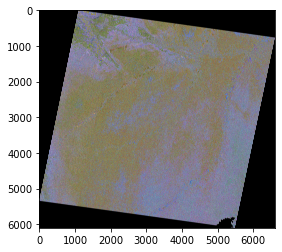

In [5]:
plt.imshow(img_t1_rgb)

In [6]:
img_t2_bgr = img_t2[:, :, 1:4]
img_t2_rgb = img_t2_bgr[:, :, ::-1].astype(np.uint8)

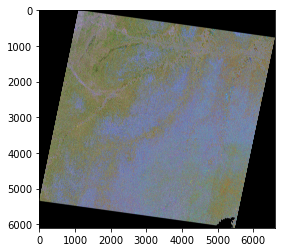

In [7]:
plt.imshow(img_t2_rgb)

In [4]:
img_mask_ref_path = 'mask_ref.npy'
img_mask_ref = load_npy_image(os.path.join(root_path, img_mask_ref_path)).astype(np.float32)
img_mask_ref = img_mask_ref[:6100, :6600]
print(f"Mask area reference shape: {img_mask_ref.shape}")
unique, counts = np.unique(img_mask_ref, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(f'Class pixels of final mask: {counts_dict}')

../DATASETS/Amazon_npy/mask_ref.npy
Mask area reference shape: (6100, 6600)
Class pixels of final mask: {-99.0: 10368203, -1.0: 29891797}


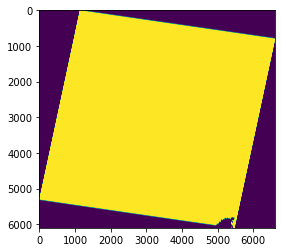

In [5]:
plt.imshow(img_mask_ref)

In [6]:
new_mask = np.zeros((6100, 6600, 3))

In [7]:
new_mask[img_mask_ref==-99] = np.array([0, 0, 0])
new_mask[img_mask_ref==-1] = np.array([255, 255, 255])

In [8]:
unique, counts = np.unique(new_mask, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(f'Class pixels of final mask: {counts_dict}')

Class pixels of final mask: {0.0: 31104609, 255.0: 89675391}


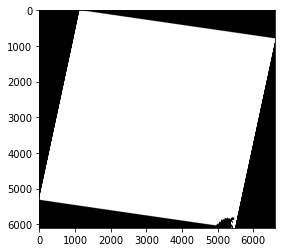

In [9]:
plt.imshow(new_mask.astype(np.uint8))

In [15]:
'''
    0 --> No deforastation
    1 --> Deforastation
'''
image_ref = load_npy_image(os.path.join(root_path,
                                        'labels/binary_clipped_2019.npy'))
# Clip to fit tiles of your specific image
image_ref = image_ref[:6100, :6600]
image_ref[img_mask_ref == -99] = -1
print(f"Image reference shape: {image_ref.shape}")

# count_deforastation(image_ref, img_mask_ref)

../DATASETS/Amazon_npy/labels/binary_clipped_2019.npy
Image reference shape: (6100, 6600)


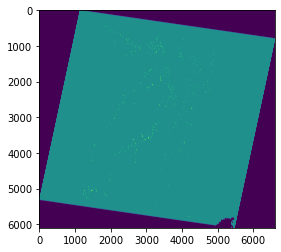

In [16]:
plt.imshow(image_ref)

In [10]:
past_ref1 = load_npy_image(os.path.join(root_path,
                                        'labels/binary_clipped_2013_2018.npy'))
past_ref2 = load_npy_image(os.path.join(root_path,
                                        'labels/binary_clipped_1988_2012.npy'))
past_ref_sum = past_ref1 + past_ref2
# Clip to fit tiles of your specific image
past_ref_sum = past_ref_sum[:6100, :6600]
past_ref_sum[img_mask_ref==-99] = -1
# Doing the sum, there are some pixels with value 2 (Case when both were deforastation).
# past_ref_sum[past_ref_sum == 2] = 1
# Same thing for background area (different from no deforastation)
# past_ref_sum[past_ref_sum==-2] = -1
print(f"Past reference shape: {past_ref_sum.shape}")

../DATASETS/Amazon_npy/labels/binary_clipped_2013_2018.npy
../DATASETS/Amazon_npy/labels/binary_clipped_1988_2012.npy
Past reference shape: (6100, 6600)


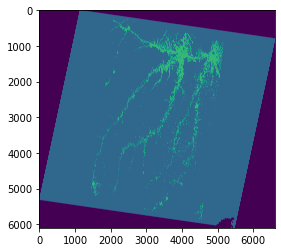

In [11]:
plt.imshow(past_ref_sum)